In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt

import linear_acoustic_fit
import nonlinear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import debye_integration as db

### Non linear fit, Debye model

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 12 K : $\beta = 0.9064 mJ/K⁴/mol$ and $\gamma = 10.95 mJ/K²/mol$, so the Debye temperature is $\theta_D = 303 K$

Between 0 and 20 K : We found $\beta = 0.992 mJ/K⁴/mol$ and $\gamma = 2.99 mJ/mol/K²$, and $\theta_D = 294 K$. Though, one can notice the probably oversestimated parameter E, with a minimum of the curve shifted to the right. 

We plot the data with the Schottky contribution, using the parameters determined from this fit. The two curves, corresponding to the two sets of (E, n), give roughly the same result. We observe that the Schottky anomaly seems to be underestimated, as the maximum of the curve is slightly lower than the difference between the minimum of the data and the point at 0 → we redo the fit with different bounds, but obtain a poorer fit.

In any case, the Schottky anomaly appears to tend towards zero for T² > 25 K², so a linear fit can be performed from that point onward

Beta, Gamma, n, E :  0.9064517303980083 10.957519739533032 0.0014273750863137411 7.122830378432147e-23


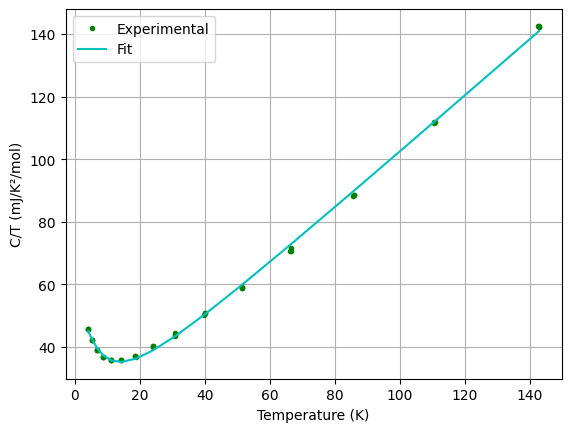

Beta, Gamma, n, E :  0.9928235188657689 2.9916424828419084 0.00163669054864844 8.499999999604586e-23


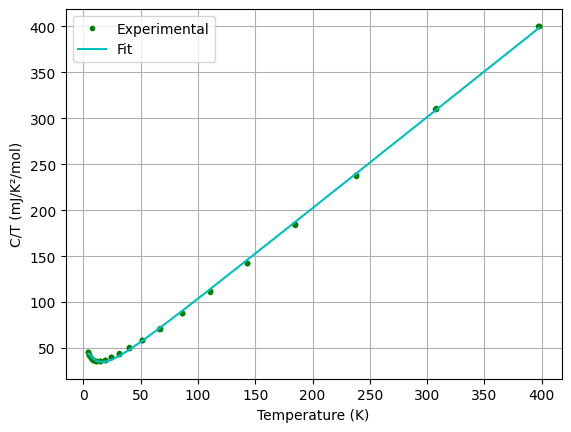

In [2]:
nonlinear_acoustic_fit.plot_fit_acoustic(0, 144, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, cnt.err_hc_div_temp_P24,
                                         bounds=([0.3, 0, 1e-3, 2e-23],[1, 20,5e-2, 8e-23]))

nonlinear_acoustic_fit.plot_fit_acoustic(0, 400, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, cnt.err_hc_div_temp_P24,
                                         bounds=([0.1, 0, 1e-3, 2e-23],[1.2, 20, 1e-1, 8.5e-23]))

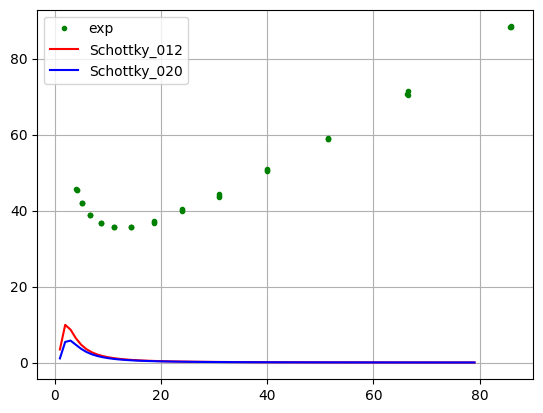

In [19]:
squared_temp_bounded, hc_div_T_bounded = tools.tab_interval(cnt.squared_temperature_P24, cnt.hc_div_temp_P24, 0, 100)
temp_test = np.arange(0, 80, 1)

y_fit_012 = sch.schottky(np.sqrt(squared_temp_bounded), 2.5931031223380538e-23, 0.0023569099183506684)
y_fit_020 = sch.schottky(np.sqrt(squared_temp_bounded), 8.499999999604586e-23, 0.00163669054864844 )


y_fit_012_test = sch.schottky(temp_test, 7.122830378432147e-23, 0.00273750863137411)
y_fit_020_test = sch.schottky(temp_test, 8.499999999604586e-23, 0.00163669054864844 )

plt.figure()
plt.plot(squared_temp_bounded, hc_div_T_bounded, ".g", label="exp")
plt.plot(temp_test, y_fit_012_test, "-r", label="Schottky_012")
plt.plot(temp_test, y_fit_020_test, "-b", label="Schottky_020")
plt.grid(True)
plt.legend()

### Linear fit, Debye model

The Schttoky contribution appears negligible after 20 K², so we can try to fit the data to a linear model, between 0 and 20 K,and between 0 and 12 K. 

Between 5 and 20 K :  We found $\beta = 0.975 mJ/K⁴/mol$ and $\gamma = 7.12 mJ/mol/K²$, $\theta_D = 295 K$

Between 5 K and 12 K :  We found $\beta = 0.890 mJ/K⁴/mol$ and $\gamma = 13.74 mJ/mol/K²$, $\theta_D = 305$


<Figure size 640x480 with 0 Axes>

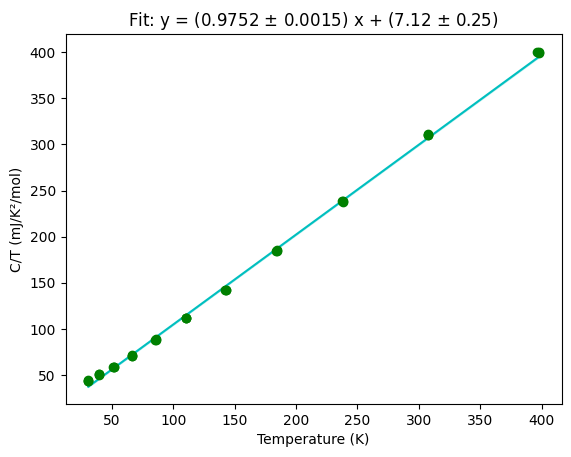

array([9.75232950e-01, 7.11538513e+00, 1.52723074e-03, 2.47761359e-01])

In [3]:
linear_acoustic_fit.linear_fit(25, 400, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, 
                               cnt.err_squared_temperature_P24,cnt.err_hc_div_temp_P24)

<Figure size 640x480 with 0 Axes>

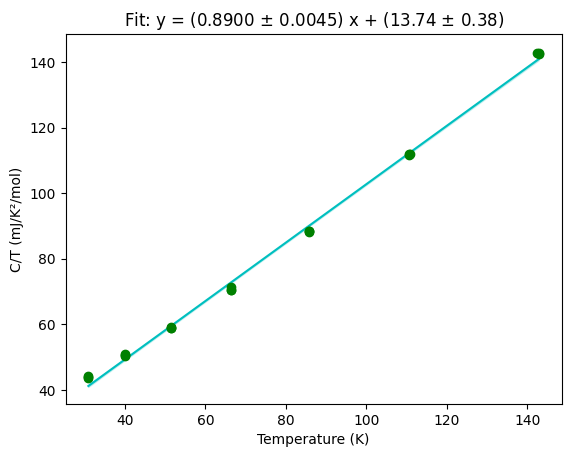

array([8.89993058e-01, 1.37350629e+01, 4.48880772e-03, 3.79882290e-01])

In [4]:
linear_acoustic_fit.linear_fit(25, 144, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, 
                               cnt.err_squared_temperature_P24,cnt.err_hc_div_temp_P24)

### Non linear fit, Debye + Einstein model

Fitting the experimental data to the Debye model with a quadratic contribution in temperature, simulating possible optical modes. Optimizong the paramters of the numercial model $y(x) = \beta x + \gamma + \alpha x^2 + Cs(x)$

Between 0 and 20 K :

$\beta = 0.9097 mJ/K^4/mol$, $\gamma = 9.32 mJ/mol/K^2$, and $\theta_D = 302 K$

Between 25 and 400 K² (polynomial fit) :

$\beta = 0.879 mJ/K^4/mol$, et $\gamma = 13.37 mJ/mol/K^2$, and $\theta_D = 306 K$

Beta, Gamma, n, E, nu :  0.9097931996368498 9.32181100348762 0.0014672224495255563 7.594922526151023e-23 0.00019390779773132227


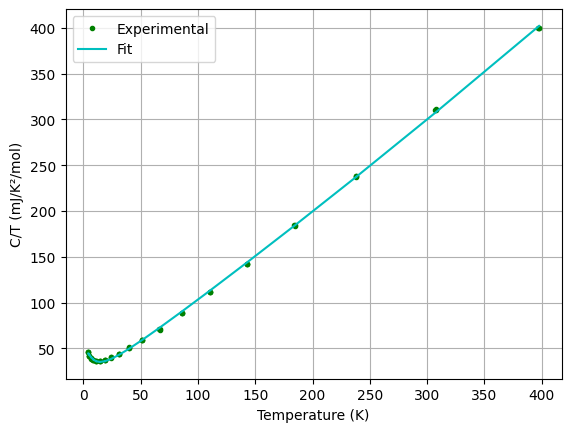

In [13]:
nonlinear_optic_fit.plot_fit_optic(0, 400, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, cnt.err_hc_div_temp_P24, 
                                   bounds = ([0.2, 0, 1e-5, 5e-23, 0],[1, 10, 5e-2, 7.9e-23, 1]))

Alpha, Beta, Gamma :  0.0002474613332924679 0.8795115433327222 13.372799967229346


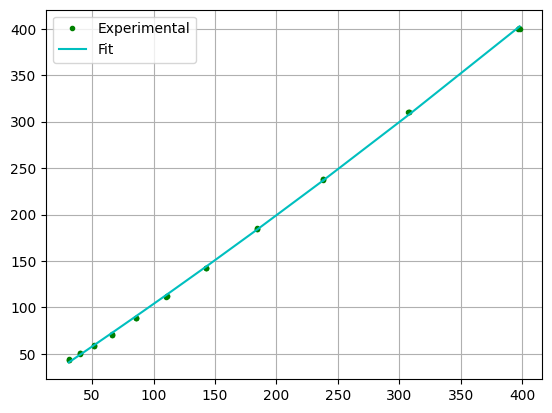

In [6]:
polynomial_optic_fit.plot_fit_quadra(25, 400, cnt.squared_temperature_P24, cnt.hc_div_temp_P24, 
                                     bounds = ([0, 0, 0],[1, 1, 20]))